# ANALYZE COMPANY'S SALES

In [1]:
# Load all the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
%matplotlib inline
sns.set_palette("colorblind")
sns.set_context("talk")
sns.set(style = "dark", rc={'figure.figsize':(11.7,8.27)})

## Reading All Files

In [2]:
transactions = pd.read_csv("datasets/transactions.csv")
customers = pd.read_csv("datasets/customers.csv")
products = pd.read_csv("datasets/products.csv")

In [3]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277


In [4]:
transactions.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
customers.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [7]:
products.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [9]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


## Cleaning All Datasets

### Cleaning transactions dataset  
#### Define

- **Some date starting with test must be split**
- **Date variable must be a *datetime* not a string**  
- **We must split id_prod in category and id_prod**
- **We must split session_id in session id and session_category**
- **We must split client_id in client_id and client_category**
- **Turn all the categories variable into a category data type**

#### Code

In [10]:
# Write  a function to split a column
def split_columns(dataset, col):
    ### This function take a dataset and a column of the dataset split the column and return the 2 new columns
    new_col_1 = dataset[col].apply(lambda x : x.split("_")[1])
    new_col_2 = dataset[col].apply(lambda x : x.split("_")[0].upper())
    return new_col_1, new_col_2

In [11]:
# Create a copy of transactions dataset
transactions_df = transactions.copy()

In [12]:
# Split id_prod in 2 columns,id_prod and category
transactions_df["id_prod"], transactions_df["category"] = split_columns(transactions_df, "id_prod")

In [13]:
# Split client_id columns into 2 columns, client_id and client_category
transactions_df["client_id"], transactions_df["client_category"] = split_columns(transactions_df, "client_id")

In [14]:
# Split session_id in 2 columns, session_id and sesseion_category
transactions_df["session_id"], transactions_df["session_category"] = split_columns(transactions_df, "session_id")

In [15]:
# Check if everything is ok
transactions_df.head(2)

,id_prod,date,session_id,client_id,category,client_category,session_category
0,1483,2021-04-10 18:37:28.723910,18746,4450,0,C,S
1,226,2022-02-03 01:55:53.276402,159142,277,2,C,S


In [16]:
# Check the different categories
transactions_df.query("category == 'T'")

,id_prod,date,session_id,client_id,category,client_category,session_category
1431,0,test_2021-03-01 02:30:02.237420,0,1,T,CT,S
2365,0,test_2021-03-01 02:30:02.237446,0,1,T,CT,S
2895,0,test_2021-03-01 02:30:02.237414,0,1,T,CT,S
5955,0,test_2021-03-01 02:30:02.237441,0,0,T,CT,S
7283,0,test_2021-03-01 02:30:02.237434,0,1,T,CT,S
...,...,...,...,...,...,...,...
332594,0,test_2021-03-01 02:30:02.237445,0,0,T,CT,S
332705,0,test_2021-03-01 02:30:02.237423,0,1,T,CT,S
332730,0,test_2021-03-01 02:30:02.237421,0,1,T,CT,S
333442,0,test_2021-03-01 02:30:02.237431,0,1,T,CT,S


There are 200 rows which date starts with test. We can guess that it was just to *test* if the system is working or not. These rows are not useful for our analysis. We will remove them.
We can therefore notice that the test day was on 2021-03-01 at 02:30:02 am.

In [17]:
# Remove all the test dates
transactions_df = transactions_df.query("category != 'T'") # Select all the rows where the category is not T
transactions_clean = transactions_df.copy() # Create a new dataframe from transactions_df to avoid warnings

In [18]:
# Check if there are still test date, no output means there is no test date anymore
assert transactions_clean.category.all() != "T"

In [19]:
transactions_clean.date = transactions_clean.date.astype("datetime64")

In [20]:
# Assert that the date is in the correct type
transactions_clean.date.head()

0   2021-04-10 18:37:28.723910
1   2022-02-03 01:55:53.276402
2   2021-09-23 15:13:46.938559
3   2021-10-17 03:27:18.783634
4   2021-07-17 20:34:25.800563
Name: date, dtype: datetime64[ns]

In [21]:
# turn all the categories variable into a category data type
transactions_clean.iloc[:, 4:] = transactions_clean.iloc[:, 4:].astype("category")

In [22]:
# Check if the variables are categories
transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_prod           336816 non-null  object        
 1   date              336816 non-null  datetime64[ns]
 2   session_id        336816 non-null  object        
 3   client_id         336816 non-null  object        
 4   category          336816 non-null  category      
 5   client_category   336816 non-null  category      
 6   session_category  336816 non-null  category      
dtypes: category(3), datetime64[ns](1), object(3)
memory usage: 13.8+ MB


### Cleaning customers dataset  
#### Define  
- **Split client_id variable into 2 variables**
- **Turn sex variabble in uppercase**
- **Turn sex variable into category data type**

#### Code

In [23]:
# Make a copy of customers dataset
customers_clean = customers.copy()

In [24]:
# Spllit client_id
customers_clean["client_id"], customers_clean["client_category"] = split_columns(customers_clean, "client_id")

In [25]:
# Turn sex in uppercase
customers_clean.sex = customers_clean.sex.map(lambda x : x.upper())

In [26]:
# Turn sex into category
customers_clean.sex = customers_clean.sex.astype("category")

In [27]:
# Check the final dataset
print(customers_clean.head())
print("=========================================")
customers_clean.info()

  client_id sex  birth client_category
0      4410   F   1967               C
1      7839   F   1975               C
2      1699   F   1984               C
3      5961   F   1962               C
4      5320   M   1943               C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   client_id        8623 non-null   object  
 1   sex              8623 non-null   category
 2   birth            8623 non-null   int64   
 3   client_category  8623 non-null   object  
dtypes: category(1), int64(1), object(2)
memory usage: 210.7+ KB


### Cleaning products dataset  
#### Define  
- **Categ variable must be category type not an int**
- **Change the categ name to category**  
- **Split the id_prod and keep just the id products**  
- **There is a price of -1, we will remove it**  

#### Code

In [28]:
# Make a copy of the products dataset
products_df = products.copy()

In [29]:
# Change the categ name to category
products_df = products_df.rename(columns={"categ":"category"})

In [30]:
# Split id_prod and keep just the id products using the split_columns function
products_df["id_prod"], products_df["category"] = split_columns(products_df, "id_prod")

In [31]:
# Turn the category into a category type
products_df.category = products_df.category.astype("category")

In [32]:
# Check if everything is correct
products_df.head(2)

,id_prod,price,category
0,1421,19.99,0
1,1368,5.13,0


In [33]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id_prod   3287 non-null   object  
 1   price     3287 non-null   float64 
 2   category  3287 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 54.9+ KB


In [34]:
# Check the -1 price row
products_df.query("price == -1")

,id_prod,price,category
731,0,-1.0,T


This is probably another test, we will remove it for a better analysis.

In [35]:
products_clean = products_df.copy()
products_clean = products_clean.query("price != -1")

In [36]:
# Check the description to see if it is ok
products_clean.describe()

,price
count,3286.000000
mean,21.863597
std,29.849786
min,0.620000
25%,6.990000
50%,13.075000
75%,22.990000
max,300.000000


Now that all the datasets are clean we can join them all together in a unique dataset for anaylysis.

In [37]:
# Join all the datasets together
sales_merge = transactions_clean.merge(products_clean, on = ["category", "id_prod"], how = "left")

In [38]:
sales_df = sales_merge.merge(customers_clean, on = ["client_id", "client_category"], how = "left")

We can see that price has less values than the other columns, probably due to missing values. Let us confirm that.

In [39]:
# Check the columns with missing values
sales_df.isna().any()

id_prod             False
date                False
session_id          False
client_id           False
category            False
client_category     False
session_category    False
price                True
sex                 False
birth               False
dtype: bool

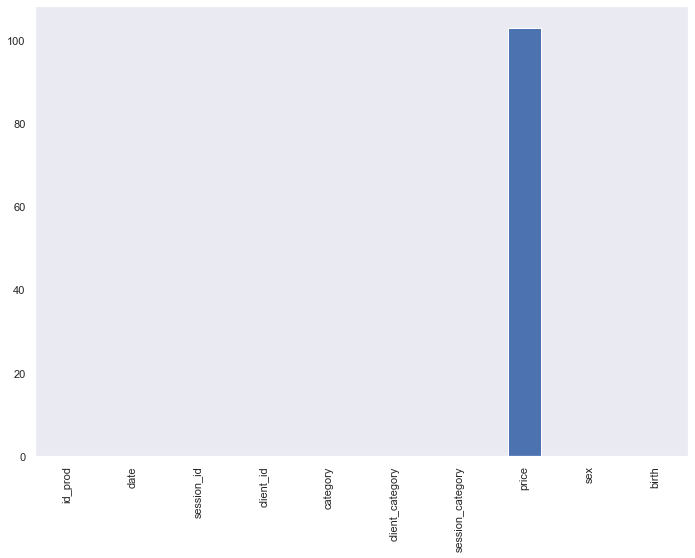

In [40]:
# Plot the missing values
sales_df.isna().sum().plot(kind = "bar");

In [41]:
# Check the id product with missing values
sales_df[sales_df.price.isna()]["id_prod"].unique()

array(['2245'], dtype=object)

There is just one product, It means that the information about this product **(id = 2245)** was not available in the product dataframe.

In [42]:
# Replace the NaN values with the median price
sales_df.price.fillna(sales_df.price.median(), inplace = True)

In [43]:
# Assert that there are no missing values anymore in the dataframe
assert sales_df.isna().all().all() == False

In [44]:
# Create the variable age, max date - birth date
actual_year = sales_df.date.max().year # Find the max year in the dataframe to use as actual year
sales_df["age"] = actual_year - sales_df.birth # Can lead to error if data is not updated over time
sales_df.head(2)

,id_prod,date,session_id,client_id,category,client_category,session_category,price,sex,birth,age
0,1483,2021-04-10 18:37:28.723910,18746,4450,0,C,S,4.99,F,1977,45
1,226,2022-02-03 01:55:53.276402,159142,277,2,C,S,65.75,F,2000,22


In [45]:
# Remove the useless column birth
sales_df = sales_df.drop("birth", axis = 1)
sales_df.head(2)

,id_prod,date,session_id,client_id,category,client_category,session_category,price,sex,age
0,1483,2021-04-10 18:37:28.723910,18746,4450,0,C,S,4.99,F,45
1,226,2022-02-03 01:55:53.276402,159142,277,2,C,S,65.75,F,22


In [46]:
print(sales_df.session_category.unique())
print(sales_df.client_category.unique())

[S]
Categories (1, object): [S]
['C']


client category and session category have just 1 category, those variables are not usefull for the analysis. We will remove them.


In [47]:
sales_clean = sales_df.drop(["client_category", "session_category"], axis = 1)
sales_clean.head(2)

,id_prod,date,session_id,client_id,category,price,sex,age
0,1483,2021-04-10 18:37:28.723910,18746,4450,0,4.99,F,45
1,226,2022-02-03 01:55:53.276402,159142,277,2,65.75,F,22


Let us rename the **sex** variable to **gender**, and **F to female**, **M to male**, for better comprehension.

In [48]:
# Rename sex variable to gender
sales_clean.rename(columns = {"sex":"gender"}, inplace = True)
# Replace F by female and M by male
sales_clean.gender.replace("F", "Female", inplace = True)
sales_clean.gender.replace("M", "Male", inplace = True)
sales_clean.head()

,id_prod,date,session_id,client_id,category,price,gender,age
0,1483,2021-04-10 18:37:28.723910,18746,4450,0,4.99,Female,45
1,226,2022-02-03 01:55:53.276402,159142,277,2,65.75,Female,22
2,374,2021-09-23 15:13:46.938559,94290,4270,1,10.71,Female,43
3,2186,2021-10-17 03:27:18.783634,105936,4597,0,4.20,Male,59
4,1351,2021-07-17 20:34:25.800563,63642,1242,0,8.99,Female,42


## Save Cleaned Datasets

In [49]:
# Create a folder to save the file
os.makedirs("clean_datasets", exist_ok=True)
# Folder to save all the images
os.makedirs("images", exist_ok = True) # Create the folder to store all the images
# Save the final dataframe
sales_clean.to_csv("clean_datasets/sales_clean.csv", index=False)
# save the cleaned datasets
products_clean.to_csv("clean_datasets/products_clean.csv", index=False)
customers_clean.to_csv("clean_datasets/customers_clean.csv", index=False)
transactions_clean.to_csv("clean_datasets/transactions_clean.csv", index = False)

[Go to the next session. Analyze the Data.](analyze_sales.ipynb)